# Why Pytorch?

PyTorch is an open-source machine learning library. It provides a flexible platform for deep learning research and development, offering both high-level features for neural network design and low-level support for tensor operations.

###Main Advantages of Using PyTorch:


1.   PyTorch's API is designed to be intuitive and close to Python's native syntax.
2.   PyTorch has a large community that contributes to its extensive library of tools, tutorials, and pre-trained models, making it easier for newcomers to get started and for experts to advance their work.
3.   PyTorch's documentation is just amazing!
4.   PyTorch offers straightforward integration with CUDA, enabling easy and efficient GPU computation. This allows for faster training of models and handling of large datasets, essential for deep learning tasks.



Let's check if you have CUDA available!

In [ ]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cpu


P.S. You can change it later in the Colab settings under the Runtime tab.

#How do we represent data in Pytorch?

Tensors are the fundamental building blocks of PyTorch and are used for storing inputs, outputs, and transformations within models. They are similar to NumPy arrays but have additional capabilities that make them uniquely suited for deep learning tasks. In essence, a tensor can be considered as a multi-dimensional array.

###Special Features of PyTorch Tensors:

1.   One of the most significant features of PyTorch tensors is their ability to be used on GPUs. This allows for substantial acceleration of computations, which is crucial for training deep learning models efficiently. Moving tensors from CPU to GPU and vice versa is straightforward by using ```my_tensor.to(device)```.

2.   PyTorch tensors work seamlessly with PyTorch's autograd system. This system automatically calculates gradients or derivatives of tensors as part of the backpropagation process, which is essential for training neural networks. The autograd system in PyTorch simplifies the process of implementing complex neural networks by automating the differentiation process.
3.   PyTorch tensors can easily be converted to and from NumPy arrays without incurring data copying costs.
4.   Tensors in PyTorch are optimized for performance, with support for various data types and hardware accelerations
5.   PyTorch provides a comprehensive set of operations for tensor manipulation, including mathematical operations, indexing, slicing, and reshaping, among others.

Let's deepen your understanding of tensors by solving some practical exercises!

###Exercise 1: Creating Tensors and Performing Basic Mathematical Operations

1. **Create Tensors**:
   - Create a 1D tensor `a` containing the first five natural numbers and a 1D tensor `b` containing the next five natural numbers.
   - Create a 2D tensor `c` of size 2x3 filled with random numbers.



In [ ]:
# YOUR SOLUTION HERE


2. **Mathematical Operations**:
   - Calculate the sum, difference, element-wise product, and division of `a` and `b`.
   - Calculate the mean and standard deviation of both `a` and `c`.

In [ ]:
# YOUR SOLUTION HERE


### Exercise 2: Indexing and Slicing

1. **Indexing**:
   - From tensor `c` created in Exercise 1, extract the element at the second row and third column.
   - Extract the first row from `c`.



In [ ]:
# YOUR SOLUTION HERE


2. **Slicing**:
   - Create a 2D tensor `d` of shape 4x4 with any numbers. Slice tensor `d` to extract the 2x2 top-right corner.
   - Extract every other element from tensor `a` created in Exercise 1.

In [ ]:
# YOUR SOLUTION HERE



###Exercise 3: Reshaping Tensors

1. **Reshape**:
   - Reshape tensor `b` into a 2x5 tensor.
   - Flatten tensor `c` into a 1D tensor.

In [ ]:
# YOUR SOLUTION HERE


2. **Concatenation**:
   - Concatenate tensors `a` and `b` along a new dimension to create a tensor of size (2, 5).
   - Stack two copies of tensor `c` vertically and horizontally.

In [ ]:
# YOUR SOLUTION HERE



###Exercise 4: Advanced Mathematical Operations

1. **Matrix Multiplication**:
   - Create two 2D tensors `e` (size 3x2) and `f` (size 2x3) filled with any numbers. Perform matrix multiplication on `e` and `f`.

In [ ]:
# YOUR SOLUTION HERE


   
2. **Element-wise Power**:
   - Take tensor `a` and raise each element to the power of 3.

In [ ]:
# YOUR SOLUTION HERE


# Automatic differentiation

Autograd is a fundamental component of PyTorch, providing automatic differentiation for all operations on tensors. It is a system that calculates the derivatives of tensors with respect to some variables. This feature is essential for the training of neural networks, where backpropagation requires the gradients of loss functions with respect to parameters (weights and biases) for optimization.

Let's take a look at the example where `y` is a function of `x`, and calling `y.backward()` computes the gradients of `y` with respect to `x` and stores them in `x.grad`.

In [ ]:
# Create a tensor and set requires_grad=True to track computation with it
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# Do a tensor operation:
y = x * 2 + 5

# Compute the gradients
y.backward(torch.tensor([1.0, 1.0, 1.0]))  # Gradient of some scalar function w.r.t x
# Here torch.tensor([1.0, 1.0, 1.0]) represents the external gradient that cames from the previous layer

# Print gradients d(y)/d(x)
print(x.grad)  # Output will be gradient of y with respect to x

tensor([2., 2., 2.])


# nn.Module

Neural networks comprise of layers/modules that perform operations on data. The torch.nn namespace provides all the building blocks you need to build your own neural network. Every module in PyTorch subclasses the nn.Module. A neural network is a module itself that consists of other modules (layers). This nested structure allows for building and managing complex architectures easily.

This means that you need to create your own class, derived from nn.Module, to create a neural network. Initialize the neural network layers in `__init__`. Implement the operations on input data in the `forward` method. Here is an example of such class implementation taken from Pytorch's official website:

In [ ]:
from torch import nn

class NeuralNetwork(torch.nn.Module):

    def __init__(self):
        super().__init__()

        self.linear1 = torch.nn.Linear(100, 200) # Linear layer with 100 inputs and 200 outputs
        self.activation = torch.nn.ReLU() # ReLU activation function
        self.linear2 = torch.nn.Linear(200, 10) # Linear layer with 200 inputs and 10 outputs
        self.softmax = torch.nn.Softmax() # Softmax activation function

    def forward(self, x): # x is input data
        x = self.linear1(x) # apply layers and activation functions one by one
        x = self.activation(x)
        x = self.linear2(x)
        x = self.softmax(x)
        return x # return the result

In this example, the input sample has 100 features, so the input of the first linear layer is 100. Then 200 is the number of hidden neurons. The output size of the first Linear layer and the input size of the second Linear layer must match. The output of the second Linear layer represents the number of output neurons, which differs according to the task.

### First Pytorch NN exercise

In this exercise, you will define a simple neural network using PyTorch, focusing on writing the `__init__` and `forward` methods within the SimpleNN class. This network will be a basic feedforward neural network suitable for classifying images from the MNIST dataset. The MNIST images are grayscale images of handwritten digits, each of size 28x28 pixels.

Task 1: Define the __init__ Method

Start by importing the necessary modules


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

Initialize the Neural Network Class:

> Define a class named `SimpleNN` that inherits from `nn.Module`.
Inside the class, define the `__init__` method. Remember to initialize the parent class (`nn.Module`) at the beginning of your `__init__` method using `super()`.

Define Layers:

>Within the `__init__` method, define the following layers using the appropriate modules from the torch.nn:

1.  A fully connected layer (nn.Linear) named fc1 that takes 784 input features (since the images are 28x28 pixels, they will be flattened to a 784-dimensional vector) and outputs 128 features.
2. Another fully connected layer (nn.Linear) named fc2 takes 128 input features (the output of fc1) and outputs 64 features.
3. A final fully connected layer (nn.Linear) named fc3 takes 64 input features and outputs 10 features, corresponding to the 10 possible classes (digits 0 through 9).

Task 2: Define the forward Method

Implement the Forward Pass:

>Define a method named `forward` within the SimpleNN class that takes one argument: `x`, the input tensor.
The first operation in your forward method should be to flatten the input tensor `x` from a 28x28 matrix into a vector of 784 elements. This can be done using the view method on tensors.

Apply Activation Functions:

>Pass the flattened input through the first fully connected layer (fc1) and then apply the ReLU activation function (`F.relu`).
Pass the result through the second fully connected layer (fc2) and again apply the ReLU activation function.
Finally, pass the result through the third fully connected layer (fc3). This time, do not apply an activation function yet.

In [ ]:
# YOUR SOLUTION HERE


Great! Now you can create instances of your network with `my_model = SimpleNN()`. After that, you can explore some helper functions provided below.

In [ ]:
# create an instance of your class
my_model = # YOUR CODE HERE

print('The model:')
print(my_model)

print('\n\nJust one layer:')
print(my_model.fc1)

print('\n\nModel params:')
for param in my_model.parameters():
    print(param)

print('\n\nLayer params:')
for param in my_model.fc2.parameters():
    print(param)

### Layer types

In the previous exercise, we used layers (`nn.Linear`) and activation functions (`nn.ReLU`, `nn.Softmax`). But there is much more! You can find all of them on [PyTorch's official website](https://pytorch.org/docs/stable/nn.html). We encourage you to take a closer look at the following layers as we are going to use them in future exercises:
* nn.Conv2d
* nn.MaxPool2d
* nn.Flatten
* nn.Dropout
* nn.LayerNorm

### Activation functions

Activation functions are also part of the nn.Module and can be applied in the same manner as network layers. The most famous activation functions are:

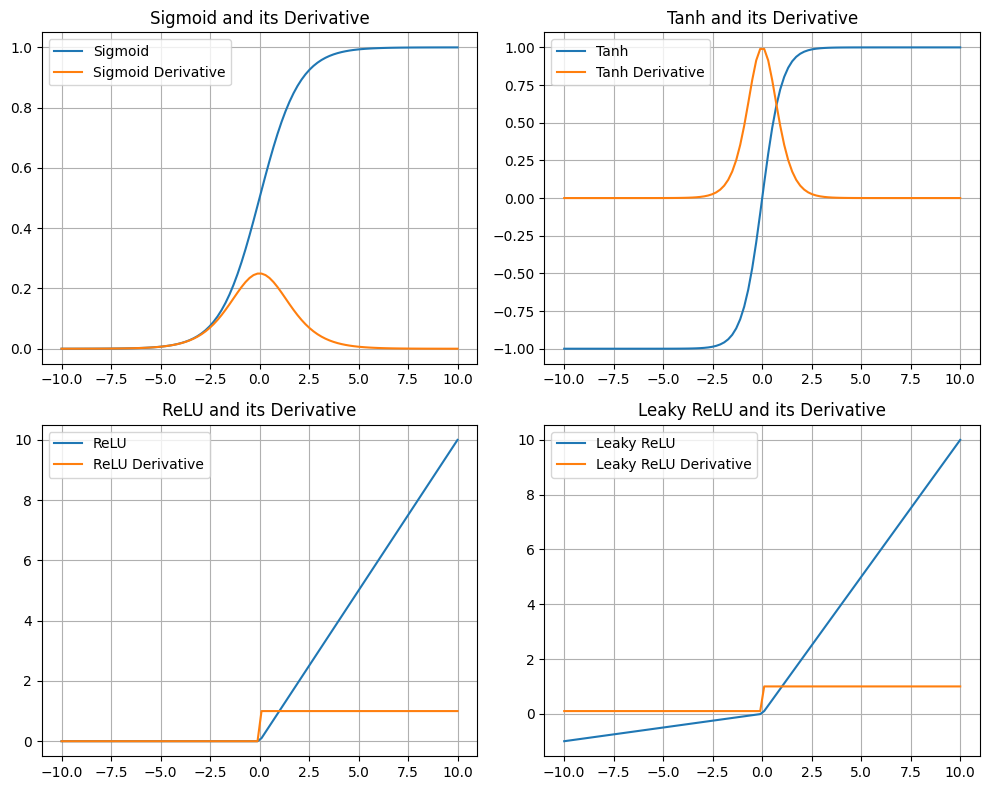

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for the plot
x = np.linspace(-10, 10, 100)

# Activation functions and their derivatives
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
  return np.tanh(x)

def tanh_derivative(x):
  return 1 - np.tanh(x)**2

def relu(x):
  return np.maximum(0, x)

def relu_derivative(x):
  return np.where(x > 0, 1, 0)

def leaky_relu(x, alpha=0.1):
  return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.1):
  return np.where(x > 0, 1, alpha)

# Plot the activation functions
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(x, sigmoid(x), label="Sigmoid")
plt.plot(x, sigmoid_derivative(x), label="Sigmoid Derivative")
plt.title("Sigmoid and its Derivative")
plt.legend()
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(x, tanh(x), label="Tanh")
plt.plot(x, tanh_derivative(x), label="Tanh Derivative")
plt.title("Tanh and its Derivative")
plt.legend()
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(x, relu(x), label="ReLU")
plt.plot(x, relu_derivative(x), label="ReLU Derivative")
plt.title("ReLU and its Derivative")
plt.legend()
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(x, leaky_relu(x), label="Leaky ReLU")
plt.plot(x, leaky_relu_derivative(x), label="Leaky ReLU Derivative")
plt.title("Leaky ReLU and its Derivative")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

These activation function are usually used in between neural network layers to introduce nonlinearity. It is important to note, however, that the choice of the activation function of the output layer is critical and heavily dependant on the task.

**Linear units - Regression tasks**

For regression tasks, the output units usually are linearly activated by
$$f(x) = x$$
with the derivative
$$f'(x) = 1$$
in Pytorch: `nn.Linear`


---



**Logistic sigmoid units - Binary classification tasks**

For binary classification tasks, the output units usually are logistic sigmaid activated by

$$f(x) = σ(x) = \frac{1}{1 + e^{-x}}$$

with the derivative
$$f'(x) = \frac{e^x}{1+e^{2x}}=σ(x)(1-σ(x))$$

in PyTorch: `nn.LogSigmoid`


---



**Softmax - Categorical classification tasks**

For categorical classification tasks, the outout units are softmax units
$$softmax(\textbf{s}) = (\frac{e^{s_1}}{\sum^{K}_{j=1}e^{s_j}}, ..., \frac{e^{s_k}}{\sum^{K}_{j=1}e^{s_j}}, ..., \frac{e^{s_K}}{\sum^{K}_{j=1}e^{s_j}})^T$$
with the derivative
$$\frac{∂softmax(\textbf{s})_i}{∂s_k}=softmax(\textbf{s})_i(δ_{ik}-softmax(\textbf{s})_k)$$

in PyTorch: `nn.Softmax`


---



### Exercise: Exploring Activation Functions in PyTorch

In this exercise, you will experiment with various activation functions provided by PyTorch, understanding their effects on neural network models.  You will use the neural network from the previous exercise and apply different activation functions to observe their impact.

Task 1: Setup and Initialization

A Neural Network Class:

> Copy a class created in the previous exercise. You will use it as a base for this exercise.



Task 2: Add an activation function placeholder to the `forward` method:

>In the `forward` method of your SimpleNN class replace all activation functions with a placeholder method self.activation that you will define later to apply an activation function.

In [ ]:
# YOUR CODE HERE


Define Multiple Activation Functions:

>Outside the SimpleNN class, define several functions that take an input tensor `x` and apply different PyTorch activation functions. For example, create functions for ReLU (`F.relu(x)`), Sigmoid (`torch.sigmoid(x)`), Tanh (`torch.tanh(x)`), and LeakyReLU (`F.leaky_relu(x)`).

In [ ]:
# YOUR CODE HERE


Experiment Setup:

>Create instances of the SimpleNN class and assign each of the activation function methods you created to self.activation in turn. You can do this by setting the attribute directly from an instance (e.g., model.activation = my_activation_function).

In [ ]:
# YOUR CODE HERE


Test and Observe:

>Generate a random tensor that mimics the shape of flattened MNIST images and pass it through the model instances with different activation functions. Observe the output and consider printing the range of output values or plotting histograms to visualize the effects of each activation function.

In [ ]:
# YOUR CODE HERE


Output activation function

> Change your neural network to include an activation function placeholder after the last layer. Repeat all the experiments again. Try Linear, Logistic Sigmois and Softmax functions. What do you get as an output every time?

In [ ]:
# YOUR CODE HERE


### Loss functions a.k.a Criterions a.k.a Cost functions a.k.a Objective functions

Loss functions measure the difference between the model's predictions and the actual target values in the training data. The goal of training is to minimize this loss, which, in turn, improves the model's accuracy and performance on unseen data.

Similarly to activations of the output layer that we discussed earlier, the choice of loss function depends on several factors, including the specific type of machine learning problem (e.g., regression, binary classification, multi-class classification) and the distribution of the target data.

**MSE, MAE - Regression tasks**

* Mean Squared Error (MSE) calculates the average of the squares of the differences between the predicted $\hat{y}_i$ and actual $y_i$ values. This function is sensitive to outliers because it squares the errors.

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2$$

In PyTorch: `nn.MSELoss`

* Mean Absolute Error (MAE): calculates the average of the **absolute** differences between the predicted $\hat{y}_i$ and actual $y_i$ values. This function is less sensitive to outliers compared to MSE.
$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |\hat{y}_i - y_i|$$

In PyTorch: `nn.L1Loss`


---


**Cross-Entropy Loss - Binary classification tasks**

 Cross-Entropy Loss is typically used because it penalizes incorrect classifications more heavily than close correct classifications, which is desirable in classification.

$$
\text{Cross-Entropy Loss} = -\left[y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right]$$

where $y_i$ is the actual label (0 or 1) and $\hat{y}_i$ is the predicted probability of the class label being 1.

in PyTorch: `nn.BCELoss`


---


**Categorical Cross-Entropy Loss - Categorical classification tasks**

Categorical Cross-Entropy Loss is used when you have more than two classes, and the classes are mutually exclusive.

$$\text{Categorical Cross-Entropy Loss} = -\sum_{c=1}^{C} y_{ic} \log(\hat{y}_{ic})$$

where $y_{ic}$ is a binary indicator of whether class $c$ is the correct classification for observation $i$, and $\hat{y}_{ic}$ is the predicted probability that observation $i$ belongs to class $c$.

in PyTorch: `nn.CrossEntropyLoss`


---

In order to monitor the training process of the neural network, experienced practitioners (us) monitor the loss on the training set and the loss on a validation set after each epoch. This results in graphs of updates (x-axis) versus loss on the training/validation set on the y-axis.

<div style="text-align: center">
  <figure style="display: inline-block; width: 49%;">
    <img src="https://api.wandb.ai/files/mostafaibrahim17/images/projects/37042936/d19f27ef.png" width="500"/>
  </figure>
</div>

*visualisations taken from the [this guide](https://wandb.ai/mostafaibrahim17/ml-articles/reports/A-Deep-Dive-Into-Learning-Curves-in-Machine-Learning--Vmlldzo0NjA1ODY0)*

### Training Behaviours

In neural network training, different behaviours can emerge based on various factors, including the architecture of the network, the choice of hyperparameters, the quality and quantity of data, and the training methodology. So imagine you see this after plotting your training curves:

<div style="text-align: center">
  <figure style="display: inline-block; width: 49%;">
    <img src="https://machinelearningmastery.com/wp-content/uploads/2019/02/Example-of-Training-Learning-Curve-Showing-An-Underfit-Model-That-Does-Not-Have-Sufficient-Capacity.png" width="500"/>
  </figure>
</div>

*visualisations taken from the [this guide](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/)*

The training loss is flat, which means that the model was unable to learn the training dataset at all! This is called **Underfitting**.

Now imagine you see something like that:

<div style="text-align: center">
  <figure style="display: inline-block; width: 49%;">
    <img src="https://machinelearningmastery.com/wp-content/uploads/2018/12/Example-of-Training-Learning-Curve-Showing-An-Underfit-Model-That-Requires-Further-Training.png" width="500"/>
  </figure>
</div>

*visualisations taken from the [this guide](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/)*

This is also **Underfitting**! We see our training loss that is decreasing and continues to decrease at the end of the plot. This indicates that the model is capable of further learning and possible further improvements and that the training process was halted prematurely.

And how about this?

<div style="text-align: center">
  <figure style="display: inline-block; width: 49%;">
    <img src="https://machinelearningmastery.com/wp-content/uploads/2018/12/Example-of-Train-and-Validation-Learning-Curves-Showing-An-Overfit-Model.png" width="500"/>
  </figure>
</div>

*visualisations taken from the [this guide](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/)*

Do you see how training loss continues to *decrease* with experience and
validation loss *decreases* to a point and begins *increasing* again?
Overfitting refers to a model that has learned the training dataset too well, including the statistical noise or random fluctuations in the training dataset.

The problem with overfitting is that the more specialized the model becomes in training data, the less well it is able to generalize to new data, resulting in an increase in generalization error. This increase in generalization error can be measured by the performance of the model on the validation dataset.

This often occurs if
- the model has more capacity than is required for the problem, and, in turn, too much flexibility.
- the model is trained for too long.

Now let us show you another training behaviour.

<div style="text-align: center">
  <figure style="display: inline-block; width: 49%;">
    <img src="https://machinelearningmastery.com/wp-content/uploads/2018/12/Example-of-Train-and-Validation-Learning-Curves-Showing-A-Good-Fit.png" width="500"/>
  </figure>
</div>

*visualisations taken from the [this guide](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/)*

This is a **good fit learning curve**! This is the ideal behaviour where the neural network's loss on both the training and validation datasets decreases over time and stabilizes. Convergence indicates that the network is effectively learning the underlying patterns in the data.

In the example above the train and validation losses are almost at the same level, but usually they have some distance between each other a.k.a. generalization gap. This distance shouldn't be too big (if it is, your train dataset is too small). The validation loss should be higher than the train loss (otherwise it means that your validation data is easier than your train data).

### Optimizers

Optimizers are used to minimize the objective function, which is typically the loss or error function measuring the difference between the predicted output of the model and the actual data.

The choice of optimizer can have a significant impact on the speed and quality of the training process of a neural network. There are numerous different optimizers available (`torch.optim.SGD`, `torch.optim.Adam`, `torch.optim.RMSprop`). We encourage you to take a look at the interactive visualization of these optimizers [here](https://emiliendupont.github.io/2018/01/24/optimization-visualization/). (Global minimum is on the left, local minimum is on the right).

What is important for us now is the adjustable hyperparameters of optimizers as we will need this for training our own neural network in the later exercise. The learning rate is one of those.

The learning rate determines the size of the steps that the optimizer takes during the gradient descent process on the loss surface. Essentially, it influences the speed and quality of the learning process.

The visualization below will help you to get an intuition on different learning rates.

1. Too High: If the learning rate is too high, the optimizer might overshoot the minimum of the loss function, leading to divergent behaviour where the model fails to converge or even exhibits worse performance over time.

2. Just Right: An optimal learning rate moves the model weights in such a way that the training process is efficient and converges to a good solution within a reasonable amount of time. Finding this optimal learning rate is crucial for effective model training.

3. Too Low: Conversely, if the learning rate is too low, the training process can become extremely slow because the steps towards the minimum are tiny. This can lead to a long training process that might get stuck in local minima.



<div style="text-align: center">
  <figure style="display: inline-block; width: 100%;">
    <img style="padding: 10px 10px" src="https://camo.githubusercontent.com/f0948a3508dfc3ea58331e9e1282798e3ae2c800e0d72b2f248afc48b26a119b/68747470733a2f2f676174746f6e7765622e756b792e6564752f666163756c74792f6c69756d2f6d6c2f6c61726765746f736d616c6c2e676966" />
  </figure>


*visualisations taken from the [github repo](https://github.com/markhliu/ml_animated?tab=readme-ov-file)

### Training and Testing loops

A training loop in machine learning (ML) refers to the process through which a machine learning model learns from data over a series of iterations, or "epochs." During each epoch, the model makes predictions based on its current state (initially random or pre-initialized weights), compares these predictions against the true outcomes using a loss function, and then adjusts its internal parameters (weights) in an effort to minimize this loss. The goal is for the model to learn the underlying patterns in the training data so that it can make accurate predictions on unseen data.

We ecourage you to take a look at this example from [PyTorch documentation](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html).

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

We also check the model's performance against the test dataset to ensure it is learning. We do it by defining a test loop. You can take a look at the example from [PyTorch documentation](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) here.

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

### Datasets and Dataloaders

PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

Here is an example of how to load the Fashion-MNIST dataset from TorchVision. Fashion-MNIST is a dataset of Zalando's article images consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28x28 grayscale image and an associated label from one of 10 classes.

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data", # root is the path where the train/test data is stored
    train=True, # train specifies training or test dataset
    download=True, # download=True downloads the data from the internet if it’s not available at root
    transform=ToTensor() # transform and target_transform specify the feature and label transformations
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:02<00:00, 11663849.71it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 218243.83it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3928810.66it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16596677.17it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



However, some PyTorch datasets have different parameters. It is always a good idea to check documentation before using PyTorch pre-loaded dataset.

The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

DataLoader is an iterable that abstracts this complexity for us in an easy API.

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

We have loaded that dataset into the DataLoader and can iterate through the dataset as needed. Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively). Because we specified shuffle=True, after we iterate over all batches the data is shuffled.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


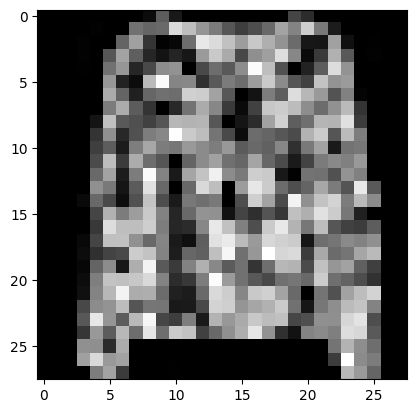

Label: 6


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# CNNs

You are already familiar with convolutions from the lecture. Here are some gifs to refresh your knowledge.

<div style="text-align: center">
  <figure style="display: inline-block; width: 33%;">
    <img src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_no_strides.gif" width="250"/>
    <figcaption style="width: 100%;"> Convolution with no padding, no strides </figcaption>
  </figure>
  <figure style="display: inline-block; width: 33%;">
    <img src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/same_padding_no_strides.gif" width="250"/>
    <figcaption style="width: 100%; text-align: center;"> Convolution with padding = 1, no strides </figcaption>
  </figure>
  <figure style="display: inline-block; width: 34%;">
    <img src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_strides.gif" width="250"/>
    <figcaption style="width: 100%; text-align: center;"> Convolution with np padding, strides = 2 </figcaption>
  </figure>
</div>

*visualisations taken from the [github repo](https://github.com/vdumoulin/conv_arithmetic) that comes with [this guide](https://arxiv.org/abs/1603.07285)*

It is really important for us to get an understanding of how different convolution parameters affect the computational complexity and memory requirements, crucial for hardware efficiency and optimization. For these reasons, we would like you to solve some hands-on exercises to get some practical knowledge.

### Exercise on convolution with different parameters



$$ x = \begin{pmatrix}
0 & 1 & 2 & 1 & 3\\
1&0&-1&3&-4\\
0&0&3&0&0\\
2&1&0&2&1\\
-2&0&-1&-3&0\\
\end{pmatrix}$$

$$$$
$$w = \begin{pmatrix}
1 & 0 & 1 \\
0&1&0\\
1&0&1\\
\end{pmatrix}$$

You are given a feature map `x` and a kernel `w`. Complete the following tasks:

**Task 1: Compute dimensionality of the output feature map after convolving `x` with `w`.**
1. Stride 1, padding 0;
2. Stride 2, padding 0;
3. Stride 3, padding 2;

*(Your are welcome to write some code to help with calculations)*



To calculate the size of the output feature map in a convolutional neural network (CNN), you can use the following formula:

Given:

- $W_{in}$: width of the input feature map
- $H_{in}$: height of the input feature map
- $K$: size of the kernel (assuming the kernel is square for simplicity)
- $P$: padding on each side of the input feature map
- $S$: stride of the convolution

The width $W_{out}$ and height $H_{out}$ of the output feature map can be calculated as follows:

$$
W_{out} = \left\lfloor \frac{W_{in} - K + 2P}{S} + 1 \right\rfloor
$$

$$
H_{out} = \left\lfloor \frac{H_{in} - K + 2P}{S} + 1 \right\rfloor
$$

In [ ]:
# YOUR ANSWER HERE


**Task 2: Compute convolurions (you can write code to solve this exercise)**
1. $s = x⋆w$, where $⋆$ is convolution operation. Calculate $s_{1,1}$ if stride = 2 and padding = 1.

In [ ]:
# YOUR ANSWER HERE


### CNN dimensionality exercise



<div style="text-align: center">
  <figure style="display: inline-block; width: 49%;">
    <img style="padding: 50px 50px" src="https://drive.google.com/uc?export=view&id=1Mccxf_54zvxXBrfSXEq1CJIQDmGCUMGh" />
  </figure>



You are given a CNN architecture as in the image above. Your task is to calculate the dimensions of an image that is propagated through this network and the number of weights in this network. The initial data dimension is [64, 64, 3], which corresponds to the width, height and number of channels of the image. No padding was used. There are bias units throughout the network. Fill in the gaps.

Layer description  | Data dimention [width, height, channel] | Number of parameters
-------------------|------------------ | -------------------
Input layer       | [64, 64, 3] | 0
C1: 4x4 convolutions with 8 kernels, stride 4     | _ | _
C2: 4x4 convolutions with 16 kernels, stride 2     | _ | _
C3: 3x3 convolutions with 32 kernels, stride 1     | _ | _
C4: 3x3 convolutions with 16 kernels, stride 1     | _ | _
F5: Fully connected layer with 512 units        | _ | _
F6: Fully connected layer with 512 units        | _ | _
O7: Output layer, fully connected layer with 100 units        | _ | _

### Max Pool vs Dilated Convolution exercise

<div style="text-align: center">
  <figure style="display: inline-block; width: 49%;">
    <img src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_strides.gif" width="250"/>
    <figcaption style="width: 100%;"> Strided convolution </figcaption>
  </figure>
  <figure style="display: inline-block; width: 49%;">
    <img src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/dilation.gif" width="250"/>
    <figcaption style="width: 100%; text-align: center;"> Dilated convolution </figcaption>
  </figure>
</div>

*visualisations taken from the [github repo](https://github.com/vdumoulin/conv_arithmetic) that comes with [this guide](https://arxiv.org/abs/1603.07285)*

Dilated convolutions “inflate” the kernel by inserting spaces between the kernel elements. The dilation “rate” is controlled by an additional hyperparameter
d. Implementations may vary, but there are usually d - 1 spaces inserted between
kernel elements such that d = 1 corresponds to a regular convolution.
Dilated convolutions are used to cheaply increase the receptive field of output
units without increasing the kernel size, which is especially effective when multiple dilated convolutions are stacked one after another.
You can calculate the sizes of the output feature maps using this formula:
Given:

- $W_{in}$: width of the input feature map
- $H_{in}$: height of the input feature map
- $K$: size of the kernel (assuming the kernel is square for simplicity)
- $d$: dilation rate
- $P$: padding on each side of the input feature map
- $S$: stride of the convolution

The width $W_{out}$ and height $H_{out}$ of the output feature map can be calculated as follows:

$$
W_{out} = \left\lfloor \frac{W_{in} - K + 2P - (K-1)(d-1)}{S} + 1 \right\rfloor
$$

$$
H_{out} = \left\lfloor \frac{H_{in} - K + 2P - (K-1)(d-1)}{S} + 1 \right\rfloor
$$

In modern convolutional neural networks, strided or dilated convolutions (see visualisations above) are often preferred over pooling. With strided convolutions, the windows are shifted. The main advantage of strided or dilated convolutions over pooling is that they can be learnt. This means that instead of relying on a fixed pooling technique, it is possible to effectively learn how the pixels in the window are to be summarised. In this exercise, we will take a closer look at strided and dilated convolutions.

**Task1: Convolution**
> Define a function called `my_conv2d()`. This function should take the following input parameters: input, kernel, stride, padding. It should output the result of the convolution of input and kernel. Implement and test this function on given data.

In [ ]:
def my_conv2d(input, kernel, stride, padding):
  """
  Parameters
  ----------
  input : (H, W) ndarray
  kernel : (K, K) ndarray
  stride : int
  padding : int

  Returns
  -------
  result : (H1, W1) ndarray
  """

  # YOUR CODE HERE

  return result


feature_map = np.arange(25).reshape(5, 5)
kernel = np.arange(9).reshape(3, 3)
stride = 1
padding = 0

**Task2: Max Pool**
> Define a function called `my_maxpool()`. This function should take the following input parameters: input, pooling_window. It should output the result of the max pool operation on the input matrix. Implement and test this function on given data.

In [ ]:
def my_maxpool(input, pooling_window):
  """
  Parameters
  ----------
  input : (H, W) ndarray
  pooling_window: int, size of the pooling window

  Returns
  -------
  result : (H1, W1) ndarray
  """

  # YOUR CODE HERE

  return result

**Task3: Dilated Convolution**
> Define a function called `my_dilatedconv2d()`. This function should take the following input parameters: input, kernel, stride, padding, dilation. It should output the result of the dilated convolution operation of the input and kernel.  Implement and test this function on given data.

P.S. You can also reuse your implementation of Task1.

In [ ]:
def my_dilatedconv2d(input, kernel, stride, padding, dilation):
  """
  Parameters
  ----------
  input : (H, W) ndarray
  kernel : (K, K) ndarray
  stride : int
  padding : int
  dilation : int

  Returns
  -------
  result : (H1, W1) ndarray
  """

  # YOUR CODE HERE

  return result

**Task4: Experiments**
> Apply `my_conv2d()` and `my_maxpool()` sequentially. Note down:
1. The size of the output
2. Output values
3. Number of trainable parameters


In [ ]:
# YOUR CODE HERE


>Apply `my_dilatedconv2d()` with `dilation` > 1. Play with different values of `dilation`. Note down:
1. The size of the output
2. Output values
3. Number of trainable parameters

In [ ]:
# YOUR CODE HERE


> What did you observe? Does it make sense to use dilated convolution instead of regular convolution and max pool? What are the advantages and disadvantages trainability-wise? memory-wise?

YOUR ANSWER HERE:

-

# Creating your model

### Objective

Understand the impact of model architecture choices on the dimensionality, memory usage, and computational complexity of CNNs.

### Exercise Overview
You will design, implement, train and analyze a CNN for an image classification task (classifying traffic signs from the GTSRB dataset). You will explore how variations in the architecture affect the model's memory footprint and computational requirements. For this exercise use the project.ipynb file provided.